# Exploring and Processing Text Data

- Lowercasing
- Punctuation removal
- Stop words removal
- Text standardization
- Spelling correction
- Tokenization
- Stemming
- Lemmatization
- Exploratory data analysis
- End-to-end processing pipeline

### 1.Converting Text Data to Lowercase

The lower() method converts all uppercase characters in a string into
lowercase characters and returns them.

#### 1.1 Read/create the text data

In [2]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity','Therewould be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','Ilike this book','I want more books like this']

In [3]:
print(text)

['This is introduction to NLP', 'It is likely to be useful,to people ', 'Machine learning is the new electrcity', 'Therewould be less hype around AI and more action goingforward', 'python is the best tool!', 'R is good langauage', 'Ilike this book', 'I want more books like this']


In [4]:
#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1               It is likely to be useful,to people 
2             Machine learning is the new electrcity
3  Therewould be less hype around AI and more act...
4                           python is the best tool!
5                                R is good langauage
6                                    Ilike this book
7                        I want more books like this


#### 1-2 Execute lower() function on the text data

In [6]:
x = 'Testing'
x2 = x.lower()
print(x2)

testing


In [7]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet']

0                          this is introduction to nlp
1                  it is likely to be useful,to people
2               machine learning is the new electrcity
3    therewould be less hype around ai and more act...
4                             python is the best tool!
5                                  r is good langauage
6                                      ilike this book
7                          i want more books like this
Name: tweet, dtype: object

### 2.Removing Punctuation

The simplest way to do this is by using the regex and replace() function in
Python.

In [9]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity',
'There would be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','I like this book','I want more books like this']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1               It is likely to be useful,to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


#### 2-1 Execute below function on the text data

In [12]:
import re
s = "I. like. This book!"
s1 = re.sub(r'[^\w\s]',"",s)

In [13]:
s1

'I like This book'

In [15]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]',"")
df['tweet']

<ipython-input-15-d5b5c85bdfc1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[^\w\s]',"")


0                          This is introduction to NLP
1                  It is likely to be usefulto people 
2               Machine learning is the new electrcity
3    There would be less hype around AI and more ac...
4                              python is the best tool
5                                  R is good langauage
6                                     I like this book
7                          I want more books like this
Name: tweet, dtype: object

In [17]:
import string
s = "I. like. This book!"
for c in string.punctuation:
    s= s.replace(c,"")

In [18]:
print(s)

I like This book


### 3. Removing Stop Words

The simplest way to do this by using the NLTK library, or you can build
your own stop words file.

In [18]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity',
'There would be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','I likethis book','I want more books like this']

In [19]:
#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1               It is likely to be useful,to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                    I likethis book
7                        I want more books like this


In [20]:
import nltk
from nltk.corpus import stopwords

In [21]:
#remove stop words
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [22]:
df['tweet']

0                                This introduction NLP
1                           It likely useful,to people
2                      Machine learning new electrcity
3    There would less hype around AI action goingfo...
4                                    python best tool!
5                                     R good langauage
6                                      I likethis book
7                                    I want books like
Name: tweet, dtype: object

### 4.Standardizing Text

Most of the text data is in the form of either customer reviews, blogs, or tweets,
where there is a high chance of people using short words and abbreviations to
represent the same meaning. This may help the downstream process to easily
understand and resolve the semantics of the text

### 4.1 Create a custom lookup dictionary

In [24]:
lookup_dict = {'nlp':'natural language processing','ur':'your', "wbu" : "what about you"}

In [37]:
print(lookup_dict)
import re

{'nlp': 'natural language processing', 'ur': 'your', 'wbu': 'what about you'}


### 4.2 Create a custom function for text standardization

In [41]:
def text_std(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        word = re.sub(r'[^\w\s]',"",word)
    if word.lower() in lookup_dict:
        word = lookup_dict[word.lower()]
        new_words.append(word)
        new_text = "".join(new_words)
    return new_text

#### 4-3 Run the text_std function

In [42]:
text_std("I like nlp it's ur choice")

UnboundLocalError: local variable 'new_text' referenced before assignment

### 5. Correcting Spelling

The simplest way to do this by using the TextBlob library.

#### 5-1 Read/create the text data

In [51]:
text=['Introduction to NLP','It is likely to be useful, topeople ','Mahine lerning is the new electrcity', 'R is goodlangauage','I like this book','I want more books like this']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                  tweet
0                   Introduction to NLP
1  It is likely to be useful, topeople 
2  Mahine lerning is the new electrcity
3                    R is goodlangauage
4                      I like this book
5           I want more books like this


#### 5-2 Execute below code on the text data

In [48]:
#Install textblob library
!pip install textblob

     |████████████████████████████████| 636 kB 217 kB/s eta 0:00:01


In [49]:
from textblob import TextBlob

In [52]:
df['tweet'].apply(lambda x: str(TextBlob(x).correct()))

0                       Introduction to NLP
1        It is likely to be useful, people 
2    Machine leaning is the new electricity
3                        R is goodlangauage
4                          I like this book
5               I want more books like this
Name: tweet, dtype: object

In [53]:
#You can also use autocorrect library as shown below
#install autocorrect
!pip install autocorrect


     |████████████████████████████████| 622 kB 217 kB/s eta 0:00:01
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=874bf0dd6a20cddd53d7e38f47433e2a09ff7072915d514343d4c98e5170643e
  Stored in directory: /Users/jothiramsanjeevi/Library/Caches/pip/wheels/72/b8/3b/a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect
autocorrect.spell is deprecated,             use autocorrect.Speller instead
message
autocorrect.spell is deprecated,             use autocorrect.Speller instead
service


In [62]:
from autocorrect import speller

In [65]:
print(speller(u'mussage'))
print(speller(u'sirvice'))

NameError: name 'speller' is not defined

In [66]:
!pip install pyspellchecker

     |████████████████████████████████| 3.4 MB 229 kB/s eta 0:00:01     |███████████                     | 1.2 MB 40 kB/s eta 0:00:56     |████████████▎                   | 1.3 MB 47 kB/s eta 0:00:45


In [67]:
from spellchecker import SpellChecker

# Create a SpellChecker object
spell = SpellChecker()


In [79]:
word = 'Oze'  # Misspelled word

# Perform autocorrection
corrected_word = spell.correction(word)
print(corrected_word)

one


### 6. Tokenizing Text

Tokenization refers to
splitting text into minimal meaningful units. There is a sentence tokenizer
and word tokenizer. We will see a word tokenizer in this recipe, which is
a mandatory step in text preprocessing for any kind of analysis. There are
many libraries to perform tokenization like NLTK, SpaCy, and TextBlob.
Here are a few ways to achieve it.

In [80]:
text=['This is introduction to NLP','It is likely to be useful,to people ','Machine learning is the new electrcity','There would be less hype around AI and more action goingforward','python is the best tool!','R is good langauage','I like this book','I want more books like this']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1               It is likely to be useful,to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


#### 6-1 Execute below code on the text data

In [82]:
!pip install Textblob

In [93]:
from textblob import TextBlob
TextBlob(df['tweet'][3]).words

WordList(['There', 'would', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'goingforward'])

In [90]:
#using NLTK
import nltk
#create data
mystring = "My favorite animal is cat"


In [91]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jothiramsanjeevi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [94]:
#using NLTK
import nltk
#create data
mystring = "My favorite animal is cat"
nltk.word_tokenize(mystring)

['My', 'favorite', 'animal', 'is', 'cat']

### 7. Stemming

In Natural Language Processing (NLP), stemming is the process of reducing a word to its base or root form, known as the stem. The stem represents the core meaning of a word, and by reducing words to their stems, we can group together words that have the same or similar meanings.

The purpose of stemming is to normalize words so that variations of the same word are treated as a single entity during text analysis. It helps in reducing the vocabulary size and achieving better results in tasks such as information retrieval, text classification, and sentiment analysis.

In [95]:
text=['I like fishing','I eat fish','There are many fishes in pound']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                            tweet
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound


#### 7-1 Stemming the text

In [98]:
#Import library
from nltk.stem import PorterStemmer

In [99]:
st = PorterStemmer()
df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                     i like fish
1                      i eat fish
2    there are mani fish in pound
Name: tweet, dtype: object

### 8. Lemmatizing

Lemmatization is the process of reducing words to their base or dictionary form, known as the lemma. Unlike stemming, which truncates words to their root form using heuristics, lemmatization considers the morphological analysis of words to generate the lemma.

The goal of lemmatization is to transform words into a canonical or normalized form, allowing different inflected forms of a word to be treated as a single term. This helps in tasks such as information retrieval, text analysis, and language understanding, where it is desirable to reduce words to their essential meaning.

The part of speech of a word is determined in lemmatization. It will
return the dictionary form of a word, which must be a valid word while
stemming just extracts the root word.
- Lemmatization handles matching “car” to “cars” along with matching “car” to “automobile.”
- Stemming handles matching “car” to “cars.”
Lemmatization can get better results.
- The stemmed form of leafs is leaf.
- The stemmed form of leaves is leav.
- The lemmatized form of leafs is leaf.
- The lemmatized form of leaves is leaf

### 8.1 Lemmatizing the data

In [101]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jothiramsanjeevi/nltk_data...


True

In [102]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Example words for lemmatization
words = ["running", "runs", "ran", "runner", "runningly"]

# Lemmatize the words
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

# Print the lemmatized words
for word, lemmatized_word in zip(words, lemmatized_words):
    print(f"{word} => {lemmatized_word}")


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jothiramsanjeevi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


running => running
runs => run
ran => ran
runner => runner
runningly => runningly


## |9. Exploring Text Data

### 9-1 Read the text data

In [6]:
#Importing data
import nltk
from nltk.corpus import webtext
nltk.download('webtext')
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to
[nltk_data]     /Users/jothiramsanjeevi/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


### 9-2 Import necessary libraries

In [7]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

### 9-3 Check number of words in the data

In [8]:
print(len(wt_sentences))
print(len(wt_words))

1142
102457


### 9-4 Compute the frequency of all words in the reviews

In [9]:
frequency_dist = nltk.FreqDist(wt_words)
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [10]:
sorted_frequency_dist =sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
sorted_frequency_dist[0:5]

['.', 'in', 'to', '"', 'the']

### 9-5 Consider words with length greater than 3 and plot

In [11]:
large_words=dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])

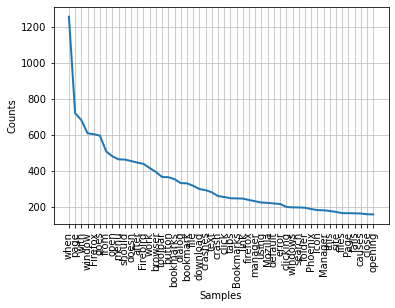

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)

### 9-6 Build Wordcloud

In [13]:
#install library
!pip install wordcloud

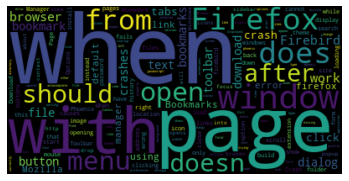

In [16]:
from wordcloud import WordCloud


# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequency_dist)
# Display the word cloud using matplotlib
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()
plt.show()



In [135]:
pip install --upgrade Pillow

     |████████████████████████████████| 3.4 MB 778 kB/s eta 0:00:01     |███████████████████             | 2.0 MB 778 kB/s eta 0:00:02
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0
Note: you may need to restart the kernel to use updated packages.


## 10. Building a Text Preprocessing Pipeline

In [18]:
tweet_sample= "How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management.#Best advice for #family #financial #success (@PrepareToWin)"

### 10-1 Process the text

In [38]:
def processRow(row):
    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize
    tweet = row
    #Lower case
    tweet.lower()
    #Removes unicode strings like "\u002c" and "x96"
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', tweet)
    tweet = re.sub(r'[^\x00-\x7f]',r'',tweet)
    #convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    #Remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)
    #Removes hastag in front of a word """
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #Remove :( or :)
    tweet = tweet.replace(':)',"")
    tweet = tweet.replace(':(',"")
    #remove numbers
    tweet = "".join([i for i in tweet if not i.isdigit()])
    #remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)
    #remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)
    #remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)
    #lemma
    from textblob import Word
    tweet ="".join([Word(word).lemmatize() for word in tweet.split()])
    #stemmer
    #st = PorterStemmer()
    #tweet=" ".join([st.stem(word) for word in tweet.split()])
    #Removes emoticons from text
    tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', "", tweet)
    #trim
    tweet = tweet.strip('\'"')
    row = tweet
    return row

In [37]:
#call the function with your data
processRow(tweet_sample)

'H o w t o t a k e c o n t r o l o f y o u r d e b t U R L a d v i c e f o r f a m i l y f i n a n c i a l s u c c e s s A T _ U S E R'